In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/Spiral.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Spiral/SpiralAugPatient/spir_0_6740.jpg  
  inflating: /content/Spiral/SpiralAugHealthy/spir_0_4513.jpg  
  inflating: /content/Spiral/SpiralAugHealthy/spir_0_3076.jpg  
  inflating: /content/Spiral/SpiralAugHealthy/spir_0_5617.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_1526.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_6399.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_8704.jpg  
  inflating: /content/Spiral/SpiralAugHealthy/spir_0_7466.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_8184.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_2175.jpg  
  inflating: /content/Spiral/SpiralAugHealthy/spir_0_3261.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_9721.jpg  
  inflating: /content/Spiral/SpiralAugHealthy/spir_0_7524.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_9817.jpg  
  inflating: /content/Spiral/SpiralAugPatient/spir_0_

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import tqdm

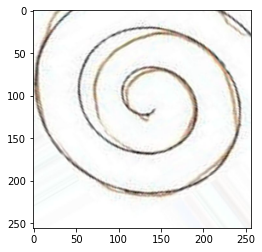

In [2]:
data_path = '/content/drive/MyDrive/Spiral'
categories = ['SpiralAugHealthy', 'SpiralAugPatient']
for category in categories:
  path = os.path.join(data_path, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    new_array = cv2.resize(img_array, (256, 256))
    plt.imshow(new_array, cmap='gray')
    # plt.show()
    break
  break

In [3]:
IMG_SIZE = 128

training_set = []

for category in categories:
  path = os.path.join(data_path, category)
  index = categories.index(category)
  for img in os.listdir(path)[:3000]:
    try:
      img_array = cv2.imread(os.path.join(path, img))
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_set.append([new_array, index])
    except Exception as e:
        pass

In [4]:
import random
random.shuffle(training_set)

In [5]:
X_train = []
y_train = []

for img_array, label in training_set:
  X_train.append(img_array)
  y_train.append(label)

In [6]:
X_train =  np.array(X_train).reshape(-1,IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

In [7]:
X_train = X_train/255.0

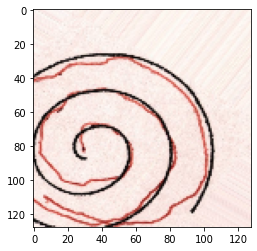

In [8]:
plt.imshow(X_train[1], cmap='gray')

In [9]:
X_train.shape

(6000, 128, 128, 3)

In [10]:
y_train.shape

(6000,)

In [11]:
# import pickle

# pickle_out = open('X_spiral_PD.pickle' , 'wb')
# pickle.dump(X_train, pickle_out)
# pickle_out.close()

# pickle_out = open('y_spiral_PD.pickle' , 'wb')
# pickle.dump(y_train, pickle_out)
# pickle_out.close()

In [12]:
import tensorflow
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential


np.random.seed(42)

SIZE=128
# img_data=[]

# img=cv2.imread('images/monalisa.jpg', 1)   #Change 1 to 0 for grey images
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
# img=cv2.resize(img,(SIZE, SIZE))
# img_data.append(img_to_array(img))

# img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
# img_array = img_array.astype('float32') / 255.


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0

In [13]:
model.fit(X_train, X_train, epochs=100)

Epoch 1/100
188/188 [==============================] - 14s 33ms/step - loss: 0.0651 - accuracy: 0.7142
Epoch 2/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0253 - accuracy: 0.8086
Epoch 3/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0199 - accuracy: 0.8313
Epoch 4/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0166 - accuracy: 0.8493
Epoch 5/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0151 - accuracy: 0.8675
Epoch 6/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0139 - accuracy: 0.8705
Epoch 7/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0132 - accuracy: 0.8730
Epoch 8/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0126 - accuracy: 0.8717
Epoch 9/100
188/188 [==============================] - 6s 31ms/step - loss: 0.0123 - accuracy: 0.8709
Epoch 10/100
188/188 [==============================] - 6s 31ms/step - loss: 0.01

Neural network output


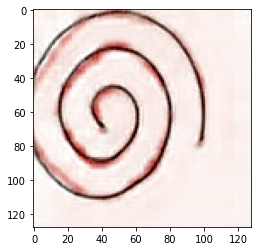

In [14]:
print("Neural network output")
pred = model.predict(X_train[0].reshape(-1, IMG_SIZE,IMG_SIZE, 3))



plt.imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")

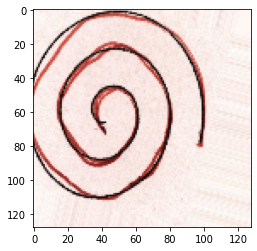

In [15]:
plt.imshow(X_train[0])

In [16]:
for layer in model.layers:
  layer.trainable = False

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)        0

In [18]:
new_model = Sequential()
for layer in model.layers[:7]:
  print(layer)
  new_model.add(layer)

In [19]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)       

In [20]:
from keras.layers import Activation, Dropout, Flatten, Dense

In [21]:
new_model.add(Flatten())
new_model.add(Dense(64))
new_model.add(Activation('relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(1))
new_model.add(Activation('sigmoid'))

In [22]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         2312      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         584       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 8)       

In [23]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
new_model.fit(X_train, y_train,epochs=200, validation_split=0.2)

Epoch 1/200
150/150 [==============================] - 3s 12ms/step - loss: 0.6092 - accuracy: 0.6508 - val_loss: 0.5086 - val_accuracy: 0.7283
Epoch 2/200
150/150 [==============================] - 1s 9ms/step - loss: 0.4779 - accuracy: 0.7581 - val_loss: 0.4455 - val_accuracy: 0.7800
Epoch 3/200
150/150 [==============================] - 1s 9ms/step - loss: 0.4426 - accuracy: 0.7779 - val_loss: 0.4223 - val_accuracy: 0.7917
Epoch 4/200
150/150 [==============================] - 1s 9ms/step - loss: 0.4397 - accuracy: 0.7862 - val_loss: 0.4175 - val_accuracy: 0.8000
Epoch 5/200
150/150 [==============================] - 1s 9ms/step - loss: 0.4242 - accuracy: 0.7883 - val_loss: 0.4174 - val_accuracy: 0.7817
Epoch 6/200
150/150 [==============================] - 1s 9ms/step - loss: 0.4185 - accuracy: 0.7927 - val_loss: 0.3993 - val_accuracy: 0.7950
Epoch 7/200
150/150 [==============================] - 1s 9ms/step - loss: 0.4184 - accuracy: 0.7973 - val_loss: 0.4066 - val_accuracy: 0.806